In [1]:
# Install Libraries
!pip install textblob
!pip install tweepy

  Using cached tweepy-3.10.0-py2.py3-none-any.whl (30 kB)
  Using cached requests_oauthlib-1.3.0-py2.py3-none-any.whl (23 kB)


In [6]:
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
consumerKey = "Enter your consumer key here"
consumerSecret = "Enter your secret consumer key here"
accessToken = "Enter your access token here"
accessTokenSecret = "Enter your secret access token here"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [8]:
def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))


tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search: lockdown
Please enter how many tweets to analyze: 100


In [9]:
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  100
positive number:  25
negative number:  36
neutral number:  39


In [10]:
tweet_list

,0
0,RT @anikasleem: Covid restrictions having us d...
1,RT @gawde_bhavesh: Evidences Indicate SSR Murd...
2,RT @dowrycakes: @ahluwaliags SIR aap photo man...
3,RT @MahyarTousi: Some people are criticising t...
4,RT @velerojo: Lockdown-Parteien wählen? https:...
...,...
95,@smilinglllama A few people protested and get ...
96,@FmMosca Sperato in che senso?\nGli autisti de...
97,RT @OzraeliAvi: Commander Mark Galliott mainta...
98,Read how Nub News can help.\n\nhttps://t.co/Oz...


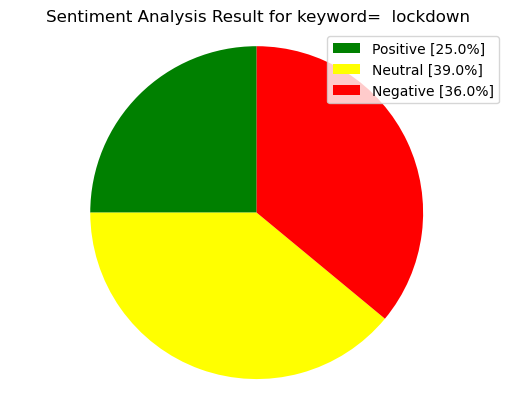

In [14]:
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['green', 'yellow','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [22]:
tweet_list.drop_duplicates(inplace = True)

In [27]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,RT @anikasleem: Covid restrictions having us d...,RT @anikasleem: Covid restrictions having us d...
1,RT @gawde_bhavesh: Evidences Indicate SSR Murd...,RT @gawde_bhavesh: Evidences Indicate SSR Murd...
2,RT @dowrycakes: @ahluwaliags SIR aap photo man...,RT @dowrycakes: @ahluwaliags SIR aap photo man...
3,RT @MahyarTousi: Some people are criticising t...,RT @MahyarTousi: Some people are criticising t...
4,RT @velerojo: Lockdown-Parteien wählen? https:...,RT @velerojo: Lockdown-Parteien wählen? https:...
...,...,...
94,RT @SharonMcAuley7: More questions over superm...,RT @SharonMcAuley7: More questions over superm...
95,@smilinglllama A few people protested and get ...,@smilinglllama A few people protested and get ...
96,@FmMosca Sperato in che senso?\nGli autisti de...,@FmMosca Sperato in che senso?\nGli autisti de...
98,Read how Nub News can help.\n\nhttps://t.co/Oz...,Read how Nub News can help.\n\nhttps://t.co/Oz...


In [28]:
tweet_list

,0,text
0,RT @anikasleem: Covid restrictions having us d...,RT @anikasleem: Covid restrictions having us d...
1,RT @gawde_bhavesh: Evidences Indicate SSR Murd...,RT @gawde_bhavesh: Evidences Indicate SSR Murd...
2,RT @dowrycakes: @ahluwaliags SIR aap photo man...,RT @dowrycakes: @ahluwaliags SIR aap photo man...
3,RT @MahyarTousi: Some people are criticising t...,RT @MahyarTousi: Some people are criticising t...
4,RT @velerojo: Lockdown-Parteien wählen? https:...,RT @velerojo: Lockdown-Parteien wählen? https:...
...,...,...
94,RT @SharonMcAuley7: More questions over superm...,RT @SharonMcAuley7: More questions over superm...
95,@smilinglllama A few people protested and get ...,@smilinglllama A few people protested and get ...
96,@FmMosca Sperato in che senso?\nGli autisti de...,@FmMosca Sperato in che senso?\nGli autisti de...
98,Read how Nub News can help.\n\nhttps://t.co/Oz...,Read how Nub News can help.\n\nhttps://t.co/Oz...


In [29]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,RT @anikasleem: Covid restrictions having us d...,covid restrictions having us down poor bua ...
1,RT @gawde_bhavesh: Evidences Indicate SSR Murd...,evidences indicate ssr murder they did not b...
2,RT @dowrycakes: @ahluwaliags SIR aap photo man...,sir aap photo mang rahe the mai video de ra...
3,RT @MahyarTousi: Some people are criticising t...,some people are criticising the australian ci...
4,RT @velerojo: Lockdown-Parteien wählen? https:...,lockdown parteien w hlen
5,RT @robyn_smith_sa: This is the energy that wa...,this is the energy that was needed on the pro...
6,RT @saaheneasiamah: Like week bia we for do lo...,like week bia we for do lockdown baako anaa m...
7,@HazzaDan @richoneill282 @sleafordmods Experim...,experimental it s proven that it great...
8,@AlecProgressive @Kmetzko1 @OticalSi @CNN Not ...,not all of us but most us dead peopl...
9,RT @Terri_1987a: Today's the big day when dict...,today s the big day when dictator dan announc...


In [30]:
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @anikasleem: Covid restrictions having us d...,covid restrictions having us down poor bua ...,-0.151852,0.429630,negative,0.140,0.860,0.000,-0.4767
1,RT @gawde_bhavesh: Evidences Indicate SSR Murd...,evidences indicate ssr murder they did not b...,0.000000,0.500000,negative,0.130,0.870,0.000,-0.4310
2,RT @dowrycakes: @ahluwaliags SIR aap photo man...,sir aap photo mang rahe the mai video de ra...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
3,RT @MahyarTousi: Some people are criticising t...,some people are criticising the australian ci...,0.000000,0.000000,negative,0.321,0.679,0.000,-0.7269
4,RT @velerojo: Lockdown-Parteien wählen? https:...,lockdown parteien w hlen,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
5,RT @robyn_smith_sa: This is the energy that wa...,this is the energy that was needed on the pro...,0.500000,0.500000,negative,0.201,0.739,0.060,-0.6826
6,RT @saaheneasiamah: Like week bia we for do lo...,like week bia we for do lockdown baako anaa m...,0.000000,0.000000,positive,0.000,0.800,0.200,0.3612
7,@HazzaDan @richoneill282 @sleafordmods Experim...,experimental it s proven that it great...,0.450000,0.575000,positive,0.000,0.842,0.158,0.2648
8,@AlecProgressive @Kmetzko1 @OticalSi @CNN Not ...,not all of us but most us dead peopl...,0.312500,0.625000,positive,0.226,0.391,0.383,0.5319
9,RT @Terri_1987a: Today's the big day when dict...,today s the big day when dictator dan announc...,0.066667,0.133333,neutral,0.000,1.000,0.000,0.0000


In [31]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [32]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [33]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,34,38.20
negative,29,32.58
positive,26,29.21


In [39]:
def create_wordcloud(text):
    mask = np.array(Image.open("s.jpg"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


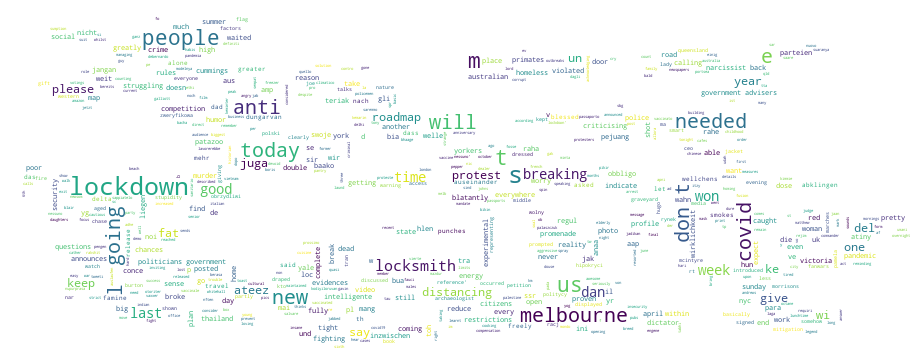

In [40]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

Word Cloud Saved Successfully


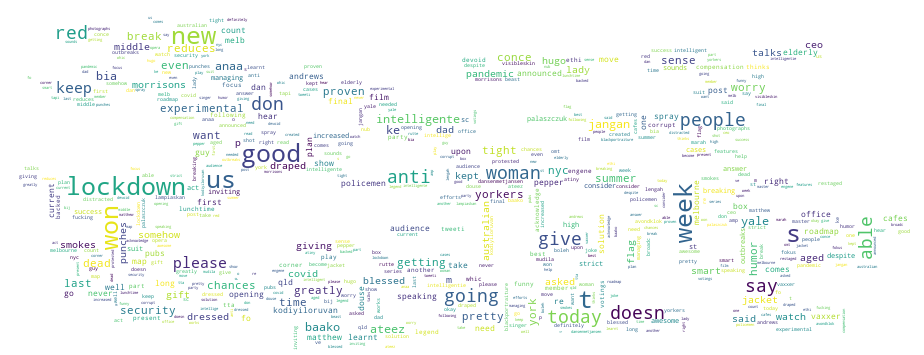

In [41]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)


Word Cloud Saved Successfully


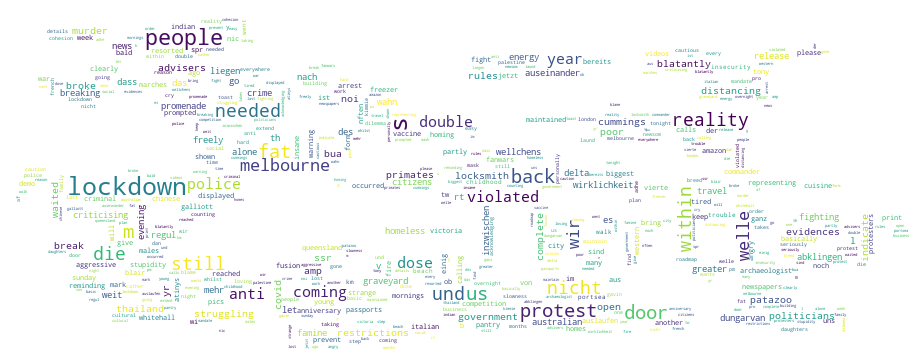

In [42]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

Word Cloud Saved Successfully


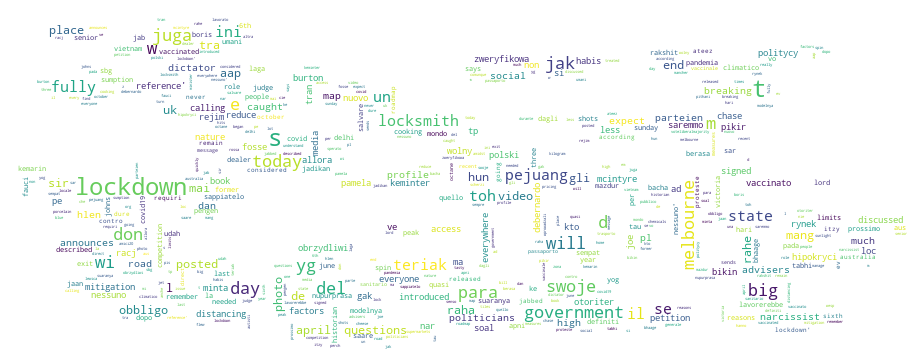

In [43]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)

In [44]:
#Calculating tweet's lenght and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))

In [45]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,110.90
neutral,97.06
positive,104.12


In [46]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,18.41
neutral,15.18
positive,19.00


In [47]:
#Removing Punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))

In [48]:
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

In [49]:
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

In [50]:
#Appliyng Stemmer
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))

In [51]:
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [52]:

tw_list.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,RT @anikasleem: Covid restrictions having us d...,covid restrictions having us down poor bua ...,-0.151852,0.42963,negative,0.140,0.860,0.0,-0.4767,129,22,covid restrictions having us down poor bua ...,"[, covid, restrictions, having, us, down, poor...","[, covid, restrictions, us, poor, bua, noi, am...","[, covid, restrict, us, poor, bua, noi, amp, p..."
1,RT @gawde_bhavesh: Evidences Indicate SSR Murd...,evidences indicate ssr murder they did not b...,0.000000,0.50000,negative,0.130,0.870,0.0,-0.4310,121,20,evidences indicate ssr murder they did not b...,"[, evidences, indicate, ssr, murder, they, did...","[, evidences, indicate, ssr, murder, break, do...","[, evid, indic, ssr, murder, break, door, wait..."
2,RT @dowrycakes: @ahluwaliags SIR aap photo man...,sir aap photo mang rahe the mai video de ra...,0.000000,0.00000,neutral,0.000,1.000,0.0,0.0000,87,17,sir aap photo mang rahe the mai video de ra...,"[, sir, aap, photo, mang, rahe, the, mai, vide...","[, sir, aap, photo, mang, rahe, mai, video, de...","[, sir, aap, photo, mang, rahe, mai, video, de..."
3,RT @MahyarTousi: Some people are criticising t...,some people are criticising the australian ci...,0.000000,0.00000,negative,0.321,0.679,0.0,-0.7269,124,19,some people are criticising the australian ci...,"[, some, people, are, criticising, the, austra...","[, people, criticising, australian, citizens, ...","[, peopl, criticis, australian, citizen, fight..."
4,RT @velerojo: Lockdown-Parteien wählen? https:...,lockdown parteien w hlen,0.000000,0.00000,neutral,0.000,1.000,0.0,0.0000,28,4,lockdown parteien w hlen,"[, lockdown, parteien, w, hlen, ]","[, lockdown, parteien, w, hlen, ]","[, lockdown, parteien, w, hlen, ]"


In [53]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

89 Number of reviews has 666 words


In [54]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

,,aap,abklingen,abl,access,accord,acknowledg,act,ad,adh,...,year,yg,yog,york,yorker,young,yr,z,zona,zweryfikowa
0,2,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
lockdown,63
peopl,7
us,6
protest,6
go,6
melbourn,6
govern,5
need,5
break,5
get,5


In [56]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [57]:
#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)

n2_bigrams

[('politicians government', 3),
 ('government advisers', 3),
 ('anti lockdown', 3),
 ('lockdown won', 2),
 ('won able', 2),
 ('lockdown protest', 2),
 ('pejuang lockdown', 2),
 ('juga teriak', 2),
 ('plan lockdown', 2),
 ('double dose', 2),
 ('lockdown 70', 2),
 ('advisers blatantly', 2),
 ('blatantly broke', 2),
 ('broke distancing', 2),
 ('distancing lockdown', 2),
 ('lockdown rules', 2),
 ('rules cummings', 2),
 ('covid restrictions', 1),
 ('restrictions having', 1),
 ('having poor', 1)]

In [58]:

#n3_trigram
n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),20)

n3_trigrams

[('politicians government advisers', 3),
 ('lockdown won able', 2),
 ('government advisers blatantly', 2),
 ('advisers blatantly broke', 2),
 ('blatantly broke distancing', 2),
 ('broke distancing lockdown', 2),
 ('distancing lockdown rules', 2),
 ('lockdown rules cummings', 2),
 ('covid restrictions having', 1),
 ('restrictions having poor', 1),
 ('having poor bua', 1),
 ('poor bua noi', 1),
 ('bua noi amp', 1),
 ('noi amp primates', 1),
 ('amp primates complete', 1),
 ('primates complete lockdown', 1),
 ('complete lockdown patazoo', 1),
 ('lockdown patazoo 30', 1),
 ('patazoo 30 years', 1),
 ('30 years thailand', 1)]